In [ ]:
pip install emukit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.4/959.4 kB 53.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emukit: filename=emukit-0.4.10-py3-none-any.whl size=257056 sha256=9cefd98737b57e2bfd56a56f312fc0fa07efb55850cb7ad28697cf66cb6b0f5e
  Stored in directory: /root/.cache/pip/wheels/30/d1/af/64ddede19b5eb77bd70362edebf9d393bf77dc34d354c11292
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102548 sha256=71397476a82c6771a

In [ ]:
import GPy
import emukit.multi_fidelity
import emukit.test_functions
from emukit.model_wrappers.gpy_model_wrappers import GPyMultiOutputWrapper
from emukit.multi_fidelity.models import GPyLinearMultiFidelityModel
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
%matplotlib inline

In [ ]:
pip install GPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
# DNS_data=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Linewssdns_short.csv')
# RANS_data=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Linewssfullrans_short.csv')

DNS_data=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/wss_uncecomp_zeroDNS.csv')
RANS_data=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/wss_uncecomp_zeroRANS.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DNS_data=DNS_data*1000
RANS_data=RANS_data*1000


In [ ]:
# Generate sample data

x_train_l =  np.array([[70,100],[70,80],[70,50],[70,30],[70,0],[60,100],[60,80],[60,50],[60,30],[60,0],[50,100],[50,80],[50,50],[50,30],[50,0],[40,100],[40,80],[40,50],[40,30],[40,0]])
x_train_h = np.array([[70,100],[70,0],[60,80],[50,50],[40,100],[40,0]])

DNS_full=DNS_data.dropna(axis=1)
DNS_full=DNS_full.values
DNS=DNS_full[:,[0,2,3,7,8,10]]
DNS=DNS[50:100,:]

DNS_test=DNS_full[:,[1,4,5,6,9]]
DNS_test=DNS_test[50:100,:]

RANS=RANS_data.dropna(axis=1)
RANS_full=RANS.values

RANS_test=RANS_full[:,[0,1,3,4,5,6,7,10,12,13,14,15,16,17,19]]
RANS=RANS_full[50:100,:]
RANS_test=RANS_test[50:100,:]
#D_70_100=np.array(DNS_data['70_100'])
#D_70_100=D_70_100.reshape(-1,1)
#np.stack(())
#print(column_values.shape)

DNS_full=np.transpose(DNS_full)
y_train_h=np.transpose(DNS)
y_train_l=np.transpose(RANS)


print(np.shape(y_train_h))
print(np.shape(y_train_l))

(6, 50)
(20, 50)


In [ ]:
# CI = np.ones(c[1])*1.96*hf_std_lin_mf_model[i,:].reshape(-1,1)
# CI=CI.T
# print(CI.shape)


In [ ]:
# x_train_l=np.c_[ x_train_l, np.zeros(len(x_train_l)) ]
# x_train_h=np.c_[ x_train_h, np.ones(len(x_train_h)) ]
# X_train=np.append(x_train_l,x_train_h,axis=0)
#
from emukit.multi_fidelity.convert_lists_to_array import convert_x_list_to_array, convert_xy_lists_to_arrays

# Y_train=np.append(y_train_h,y_train_l,axis=0)
X_train, Y_train = convert_xy_lists_to_arrays([x_train_l, x_train_h], [y_train_l, y_train_h])
print(X_train.shape)
print(Y_train.shape)

print(X_train)

(26, 3)
(26, 50)
[[ 70. 100.   0.]
 [ 70.  80.   0.]
 [ 70.  50.   0.]
 [ 70.  30.   0.]
 [ 70.   0.   0.]
 [ 60. 100.   0.]
 [ 60.  80.   0.]
 [ 60.  50.   0.]
 [ 60.  30.   0.]
 [ 60.   0.   0.]
 [ 50. 100.   0.]
 [ 50.  80.   0.]
 [ 50.  50.   0.]
 [ 50.  30.   0.]
 [ 50.   0.   0.]
 [ 40. 100.   0.]
 [ 40.  80.   0.]
 [ 40.  50.   0.]
 [ 40.  30.   0.]
 [ 40.   0.   0.]
 [ 70. 100.   1.]
 [ 70.   0.   1.]
 [ 60.  80.   1.]
 [ 50.  50.   1.]
 [ 40. 100.   1.]
 [ 40.   0.   1.]]


In [ ]:
## Create standard GP model using only high-fidelity data
x_train_DNS=x_train_h
y_train_DNS=y_train_h
kernelDNS = GPy.kern.ExpQuad(input_dim=2,lengthscale=[100,100],variance=0.0001, ARD=True)
kernelDNS.lengthscale.constrain_bounded(0,1000)
kernelDNS.variance.constrain_bounded(0,10)
high_gp_model = GPy.models.GPRegression(x_train_DNS, y_train_DNS, kernelDNS)
high_gp_model.Gaussian_noise.fix(5)

## Fit the GP model

high_gp_model.optimize_restarts(100)


Optimization restart 1/100, f = 1632.5420698040778
Optimization restart 2/100, f = 1315.268745283234
Optimization restart 3/100, f = 1315.273205219534
Optimization restart 4/100, f = 1315.2687420247094
Optimization restart 5/100, f = 1634.2372671255023
Optimization restart 6/100, f = 1634.23699863298
Optimization restart 7/100, f = 1634.236963013187
Optimization restart 8/100, f = 1315.2687393711867
Optimization restart 9/100, f = 1632.7317884113527
Optimization restart 10/100, f = 1634.236960997908
Optimization restart 11/100, f = 1634.2369604191308
Optimization restart 12/100, f = 1315.2687371279308
Optimization restart 13/100, f = 1634.236966022209
Optimization restart 14/100, f = 1315.2687421534256
Optimization restart 15/100, f = 1315.2687399814693
Optimization restart 16/100, f = 1315.2687469714447
Optimization restart 17/100, f = 1633.9138190677647
Optimization restart 18/100, f = 1634.2373131946524
Optimization restart 19/100, f = 1634.2031792171554
Optimization restart 20/100,

In [ ]:
print(high_gp_model.ExpQuad.lengthscale[0])
print(high_gp_model.ExpQuad.lengthscale[1])
print(high_gp_model.ExpQuad.variance)
print(high_gp_model.gradient)
# Get the gradients of optimization
gradients_dns = high_gp_model.gradient

# Get the names of the model's parameters
parameter_dns = high_gp_model.parameter_names()

# Print the gradients along with the parameter names
print("Gradients of Optimization:")
for i in range(len(parameter_dns)):
    print(f"Parameter: {parameter_dns[i]} - Gradient: {gradients_dns[i]}")


19.524723114197343
999.9999129284212
  index  |  GP_regression.ExpQuad.variance  |  constraints  |  priors
  [0]    |                      9.99999998  |   0.0,10.0    |        
[ 3.36490963e+01 -7.93428942e-08  2.21822423e-03  8.39569043e+00]
Gradients of Optimization:
Parameter: ExpQuad.variance - Gradient: 33.64909633194445
Parameter: ExpQuad.lengthscale - Gradient: -7.934289423096866e-08
Parameter: Gaussian_noise.variance - Gradient: 0.002218224234293957


In [ ]:
## Create standard GP model using only low-fidelity data

x_train_RANS= np.array([[70,100],[70,80],[70,30],[70,0],[60,100],[60,80],[60,50],[50,100],[50,50],[50,30],[50,0],[40,100],[40,80],[40,50],[40,0]])

y_train_RANS=np.transpose(RANS_test)
print(y_train_RANS.shape)

(15, 50)


In [ ]:
# Perform sensitivity analysis using Sobol indices
sensitivity = high_gp_model.input_sensitivity()

# Calculate the sum of sensitivity indices
sensitivity_sum = sum(sensitivity)

# Normalize the sensitivity indices
normalized_sensitivity = [index / sensitivity_sum for index in sensitivity]

# Calculate the total Sobol indices
total_sobol_indices = [index ** 2 for index in normalized_sensitivity]

# Normalize the total Sobol indices
total_sobol_sum = sum(total_sobol_indices)
normalized_total_sobol_indices = [index / total_sobol_sum for index in total_sobol_indices]

# Print the normalized total Sobol indices
print("Normalized Total Sobol Indices:")
for i, sobol_index in enumerate(normalized_total_sobol_indices):
    print(f"Variable {i+1}: {sobol_index}")


Normalized Total Sobol Indices:
Variable 1: 0.999999854675237
Variable 2: 1.4532476290661406e-07


In [ ]:
# Perform sensitivity analysis using Sobol indices
sensitivity = high_gp_model.input_sensitivity()

# Normalize the sensitivity indices
sensitivity_sum = sum(sensitivity)
normalized_sensitivity = [index / sensitivity_sum for index in sensitivity]

# Print the normalized sensitivity indices
print("Normalized Sensitivity Indices:")
for i, sensitivity_index in enumerate(normalized_sensitivity):
    print(f"Variable {i+1}: {sensitivity_index}")

Normalized Sensitivity Indices:
Variable 1: 0.5000000065572159
Variable 2: 0.49999999344278406


In [ ]:
kernelRANS = GPy.kern.ExpQuad(input_dim=2,lengthscale=[10,10],variance=0.05, ARD=True)
kernelRANS.lengthscale.constrain_bounded(0,1000)
kernelRANS.variance.constrain_bounded(0,10)
low_gp_model = GPy.models.GPRegression(x_train_RANS, y_train_RANS, kernelRANS)
low_gp_model.Gaussian_noise.fix(10)

## Fit the GP model


low_gp_model.optimize_restarts(100)

Optimization restart 1/100, f = 2231.2985900421763
Optimization restart 2/100, f = 2528.7091478715847
Optimization restart 3/100, f = 2231.2988308454346
Optimization restart 4/100, f = 2528.688461712579
Optimization restart 5/100, f = 2528.708920696214
Optimization restart 6/100, f = 2231.298614836096
Optimization restart 7/100, f = 2528.7308184447916
Optimization restart 8/100, f = 2528.709143910077
Optimization restart 9/100, f = 2231.2985924519944
Optimization restart 10/100, f = 2231.2986846999056
Optimization restart 11/100, f = 2528.709149968916
Optimization restart 12/100, f = 2528.709144102047
Optimization restart 13/100, f = 2231.2985889879574
Optimization restart 14/100, f = 2231.29884116555
Optimization restart 15/100, f = 2231.2990718317396
Optimization restart 16/100, f = 2528.7091535587856
Optimization restart 17/100, f = 2528.709150900462
Optimization restart 18/100, f = 2528.7091512836114
Optimization restart 19/100, f = 2231.298589745776
Optimization restart 20/100, f 

In [ ]:
print(low_gp_model.ExpQuad.lengthscale[0])
print(low_gp_model.ExpQuad.lengthscale[1])
print(low_gp_model.ExpQuad.variance)

# Get the gradients of optimization
gradients_rans = low_gp_model.gradient

# Get the names of the model's parameters
parameter_rans = low_gp_model.parameter_names()

# Print the gradients along with the parameter names
print("Gradients of Optimization:")
for i in range(len(parameter_rans)):
    print(f"Parameter: {parameter_rans[i]} - Gradient: {gradients_rans[i]}")


18.41124534677884
999.9999972929783
  index  |  GP_regression.ExpQuad.variance  |  constraints  |  priors
  [0]    |                     10.00000000  |   0.0,10.0    |        
Gradients of Optimization:
Parameter: ExpQuad.variance - Gradient: 31.00592574561534
Parameter: ExpQuad.lengthscale - Gradient: -1.0975202118197371e-07
Parameter: Gaussian_noise.variance - Gradient: 0.001138360714646162


In [ ]:
# Perform sensitivity analysis using Sobol indices
sensitivity = low_gp_model.input_sensitivity()

# Normalize the sensitivity indices
sensitivity_sum = sum(sensitivity)
normalized_sensitivity = [index / sensitivity_sum for index in sensitivity]

# Print the normalized sensitivity indices
print("Normalized Sensitivity Indices:")
for i, sensitivity_index in enumerate(normalized_sensitivity):
    print(f"Variable {i+1}: {sensitivity_index}")

Normalized Sensitivity Indices:
Variable 1: 0.9973525542597376
Variable 2: 0.0026474457402624377


In [ ]:
# Perform sensitivity analysis using Sobol indices
sensitivity = low_gp_model.input_sensitivity()

# Calculate the sum of sensitivity indices
sensitivity_sum = sum(sensitivity)

# Normalize the sensitivity indices
normalized_sensitivity = [index / sensitivity_sum for index in sensitivity]

# Calculate the total Sobol indices
total_sobol_indices = [index ** 2 for index in normalized_sensitivity]

# Normalize the total Sobol indices
total_sobol_sum = sum(total_sobol_indices)
normalized_total_sobol_indices = [index / total_sobol_sum for index in total_sobol_indices]

# Print the normalized total Sobol indices
print("Normalized Total Sobol Indices:")
for i, sobol_index in enumerate(normalized_total_sobol_indices):
    print(f"Variable {i+1}: {sobol_index}")


Normalized Total Sobol Indices:
Variable 1: 0.9999929538210725
Variable 2: 7.046178927508641e-06


In [ ]:
# Print the interaction terms
print("Interaction Terms:")
for i in range(len(sensitivity)):
    for j in range(i+1, len(sensitivity)):
        interaction = sensitivity[i] * sensitivity[j]
        print(f"Variable {i+1} x Variable {j+1}: {interaction}")


Interaction Terms:
Variable 1 x Variable 2: 0.0009984569887588816


In [ ]:
kernels = [GPy.kern.ExpQuad(input_dim=2,lengthscale=[10,10],variance=0.005, ARD=True),GPy.kern.ExpQuad(input_dim=2,lengthscale=[10,10],variance=0.005, ARD=True)]
# for kernel in kernels:
#     kernel.lengthscale.constrain_bounded(0, 50)
#     kernel.variance.constrain_bounded(0, 10)
for i, kernel in enumerate(kernels):
    if i == 0:  # First fidelity
        kernel.lengthscale.constrain_bounded(0,1000)
        kernel.variance.constrain_bounded(0, 5)
    elif i == 1:  # Second fidelity
        kernel.lengthscale.constrain_bounded(0, 1000)
        kernel.variance.constrain_bounded(0, 10)
lin_mf_kernel = emukit.multi_fidelity.kernels.LinearMultiFidelityKernel(kernels)

gpy_lin_mf_model = GPyLinearMultiFidelityModel(X_train, Y_train, lin_mf_kernel, n_fidelities=2)

gpy_lin_mf_model.mixed_noise.Gaussian_noise.fix(20)
gpy_lin_mf_model.mixed_noise.Gaussian_noise_1.fix(0.1)

lin_mf_model =model=GPyMultiOutputWrapper(gpy_lin_mf_model, 2, n_optimization_restarts=50)

## Fit the model

lin_mf_model.optimize()

Optimization restart 1/50, f = 3896.8375586800203
Optimization restart 2/50, f = 3896.837924282707
Optimization restart 3/50, f = 3902.75549248506
Optimization restart 4/50, f = 5891.929263629738
Optimization restart 5/50, f = 3915.74027582781
Optimization restart 6/50, f = 3896.8375649148097
Optimization restart 7/50, f = 5630.283553717023
Optimization restart 8/50, f = 3897.4062475787928


 /usr/local/lib/python3.10/dist-packages/GPy/kern/src/stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Optimization restart 9/50, f = 5738.770895267962
Optimization restart 10/50, f = 3897.410804744577
Optimization restart 11/50, f = 3900.785479896206
Optimization restart 12/50, f = 3896.8375582651497
Optimization restart 13/50, f = 3896.8380429045164
Optimization restart 14/50, f = 3922.0268323131468
Optimization restart 15/50, f = 3930.0195701959374
Optimization restart 16/50, f = 3896.837751713897
Optimization restart 17/50, f = 3925.7323677535164
Optimization restart 18/50, f = 3897.4132587234494
Optimization restart 19/50, f = 3897.4120569687866
Optimization restart 20/50, f = 3896.837558288385
Optimization restart 21/50, f = 5625.676851410333
Optimization restart 22/50, f = 3896.8379462257944
Optimization restart 23/50, f = 3900.785476380739
Optimization restart 24/50, f = 3963.6200180105507
Optimization restart 25/50, f = 3897.4131018187804
Optimization restart 26/50, f = 3897.4132679062295
Optimization restart 27/50, f = 3897.41379092055
Optimization restart 28/50, f = 3897.4132

In [ ]:
 print(gpy_lin_mf_model)


Name : gp
Objective : 3893.4147339485853
Number of Parameters : 9
Number of Optimization Parameters : 7
Updates : True
Parameters:
  gp.                                    |               value  |  constraints  |  priors
  multifidelity.ExpQuad.variance         |                 5.0  |    0.0,5.0    |        
  multifidelity.ExpQuad.lengthscale      |                (2,)  |  0.0,1000.0   |        
  multifidelity.ExpQuad_1.variance       |   8.023079137933971  |   0.0,10.0    |        
  multifidelity.ExpQuad_1.lengthscale    |                (2,)  |  0.0,1000.0   |        
  multifidelity.scale                    |  1.5579079072874855  |               |        
  mixed_noise.Gaussian_noise.variance    |                20.0  |   +ve fixed   |        
  mixed_noise.Gaussian_noise_1.variance  |                 0.1  |   +ve fixed   |        


In [ ]:
  print(gpy_lin_mf_model.multifidelity.ExpQuad.variance)
  print(gpy_lin_mf_model.multifidelity.ExpQuad_1.variance)
  print(gpy_lin_mf_model.multifidelity.ExpQuad.lengthscale)
  print(gpy_lin_mf_model.multifidelity.ExpQuad_1.lengthscale)

  index  |  gp.multifidelity.ExpQuad.variance  |  constraints  |  priors
  [0]    |                         5.00000000  |    0.0,5.0    |        
  index  |  gp.multifidelity.ExpQuad_1.variance  |  constraints  |  priors
  [0]    |                           8.02307914  |   0.0,10.0    |        
  index  |  gp.multifidelity.ExpQuad.lengthscale  |  constraints  |  priors
  [0]    |                           18.81933671  |  0.0,1000.0   |        
  [1]    |                          999.99997837  |  0.0,1000.0   |        
  index  |  gp.multifidelity.ExpQuad_1.lengthscale  |  constraints  |  priors
  [0]    |                              0.00000178  |  0.0,1000.0   |        
  [1]    |                            230.37273292  |  0.0,1000.0   |        


In [ ]:
# Get the gradients of optimization
gradients_mf = gpy_lin_mf_model.multifidelity.gradient

# Get the names of the model's parameters
parameter_mf = gpy_lin_mf_model.multifidelity.parameter_names()

# Print the gradients along with the parameter names
print("Gradients of Optimization:")
for i in range(len(parameter_mf)):
    print(f"Parameter: {parameter_mf[i]} - Gradient: {gradients_mf[i]}")

Gradients of Optimization:
Parameter: ExpQuad.variance - Gradient: 87.7743510304802
Parameter: ExpQuad.lengthscale - Gradient: -0.42041177368315363
Parameter: ExpQuad_1.variance - Gradient: 0.0044016215413452565
Parameter: ExpQuad_1.lengthscale - Gradient: -3.948053863949161
Parameter: scale - Gradient: -0.0


In [ ]:

#x_plot=np.reshape(x,[10000,2])
x_plot=np.array([[70,50],[60,30],[60,0],[50,80],[40,30]])
X_plot_l=np.c_[ x_plot, np.zeros(len(x_plot)) ]
X_plot_h=np.c_[ x_plot, np.ones(len(x_plot)) ]

In [ ]:
hf_mean_lin_mf_model, hf_var_lin_mf_model = lin_mf_model.predict(X_plot_h)

hf_std_lin_mf_model = np.sqrt(hf_var_lin_mf_model)
hf_mean_high_gp_model, hf_var_high_gp_model  = high_gp_model.predict(X_plot_h)
lf_mean_low_gp_model, lf_var_low_gp_model  = low_gp_model.predict(X_plot_h)

 <ipython-input-165-e5cecfbcc466>:3: RuntimeWarning:invalid value encountered in sqrt


In [ ]:
# print(np.amax(hf_mean_lin_mf_model))
print(np.sqrt(hf_var_lin_mf_model)*1.96)
print(np.sqrt(hf_var_high_gp_model)*1.96)
print(np.sqrt(lf_var_low_gp_model)*1.96)
# c=(hf_mean_lin_mf_model.shape)
# print(c)



[[0.92581976]
 [0.93438112]
 [1.02127957]
 [0.89596271]
 [       nan]]
[[5.06645623]
 [5.02377175]
 [5.03254866]
 [5.0223975 ]
 [5.06761055]]
[[6.67029656]
 [6.54582864]
 [6.55267246]
 [6.52566365]
 [6.65541432]]


 <ipython-input-166-fdaab20bcb5f>:2: RuntimeWarning:invalid value encountered in sqrt


In [ ]:
print(hf_mean_lin_mf_model)
print(hf_mean_high_gp_model)
print(lf_mean_low_gp_model)

[[ 1.38197865e-01 -1.06858952e+00  1.30114308e+00  6.77826990e-01
  -2.00028650e+00 -1.94157195e+00 -2.90830365e+00 -4.30033638e+00
  -5.97187445e+00 -7.65932165e+00 -1.02873195e+01 -1.31139509e+01
  -1.63237897e+01 -1.98401524e+01 -2.36969269e+01 -2.76887501e+01
  -3.17135946e+01 -3.55524566e+01 -3.88625517e+01 -4.13543652e+01
  -4.29541363e+01 -4.33202345e+01 -4.19113623e+01 -3.85020899e+01
  -3.33587392e+01 -2.69632328e+01 -1.94225425e+01 -1.17798037e+01
  -4.71163537e+00  9.16082235e-01  4.08065072e+00  4.59025721e+00
   3.47753761e+00  1.52633577e+00 -5.73000455e-01 -1.85979820e+00
  -2.36859206e+00 -2.42063191e+00 -2.26868796e+00 -1.99339349e+00
  -1.71719965e+00 -1.45599729e+00 -1.21977527e+00 -1.03612961e+00
  -8.73145483e-01 -7.32314347e-01 -6.13828769e-01 -5.33140926e-01
  -4.02093435e-01 -3.72745981e-01]
 [ 5.80382418e-02 -6.79647797e-01  6.11878935e-01  1.88151249e-01
  -1.41659548e+00 -1.47000646e+00 -2.12176317e+00 -3.02719110e+00
  -4.09774002e+00 -5.19921185e+00 -6.8693

In [ ]:
print(ytrain.shape)

NameError: ignored

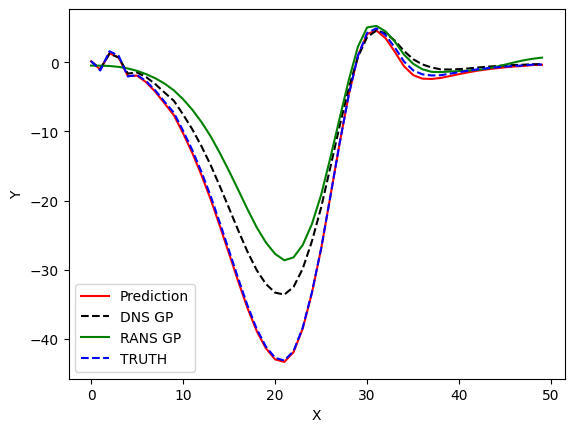

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
fig,ax=plt.subplots()
#DNS_test.shape[0]
i=0


x_pred = np.linspace(0,49,50).reshape(-1, 1)
# Calculate upper and lower confidence bounds
confidence = 1.96 # 95% confidence interval (approximate)
lower_bound = hf_mean_lin_mf_model[i]- confidence * np.sqrt(hf_var_lin_mf_model[i])
upper_bound = hf_mean_lin_mf_model[i]+ confidence * np.sqrt(hf_var_lin_mf_model[i])
ax.plot(hf_mean_lin_mf_model[i],color='r',label='Prediction')
# ax.fill_between(x_pred.flatten(), lower_bound.flatten(), upper_bound.flatten(), color='red', alpha=0.5, label='C.I-MF')



#for i in range(1):
#ax.fill_between((hf_mean_lin_mf_model[0] - 1.96*hf_std_lin_mf_model[0]).flatten(),
#(hf_mean_lin_mf_model[0] + 1.96*hf_std_lin_mf_model[0]).flatten(), color='r', alpha=0.3)
# ax.plot(RANS_test[:,i],color='k',linestyle='dotted',label='RANS')
ax.plot(hf_mean_high_gp_model[i],color='black',linestyle='--',label='DNS GP')
lower_bound_dns = hf_mean_high_gp_model[i]- confidence * np.sqrt(hf_var_high_gp_model[i])
upper_bound_dns = hf_mean_high_gp_model[i]+ confidence * np.sqrt(hf_var_high_gp_model[i])
# ax.fill_between(x_pred.flatten(), lower_bound_dns.flatten(), upper_bound_dns.flatten(), color='gray', alpha=0.3, label='C.I-DNS')
ax.plot(lf_mean_low_gp_model[i],color='green',label='RANS GP')
lower_bound_rans = lf_mean_low_gp_model[i]- confidence * np.sqrt(lf_var_low_gp_model[i])
upper_bound_rans = lf_mean_low_gp_model[i]+ confidence * np.sqrt(lf_var_low_gp_model[i])
# ax.fill_between(x_pred.flatten(), lower_bound_rans.flatten(), upper_bound_rans.flatten(), color='green', alpha=0.3, label='C.I-RANS')
ax.plot(DNS_test[:,i],color='b',linestyle='--',label='TRUTH')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()


# x_data=x_pred
# y_truth=DNS_test[:,i].reshape(-1,1)

# print(y_truth.shape)
# print(x_data.shape)
# write_truth = np.stack((x_data,y_truth), axis = 1).reshape(-1,2)


# e= "streamwise WSS"
# hdrtxt='# xpoints','#ypoints'
# np.savetxt('/content/drive/MyDrive/ColabNotebooks/Truth_40_e30Mag.dat', write_truth, delimiter='  ', header='Position\tMean', comments='' )
# np.savetxt('MF_70_e50_dns5_rans_8.dat', zip(write_mf), fmt=['%.3f','%.3f'])
# np.savetxt('LF_70_e50_dns5_rans_8.dat', zip(x_data,y_lf), fmt=['%.3f','%.3f'])
# np.savetxt('HF_70_e50_dns5_rans_8.dat', zip(x_data,y_hf), fmt=['%.3f','%.3f'])

In [ ]:
print(np.sqrt(hf_var_high_gp_model[i]))
# print(x_pred)
print(lf_var_low_gp_model)
print(hf_var_high_gp_model)
print(hf_var_lin_mf_model)

[2.58551559]
[[11.58185554]
 [11.15365279]
 [11.17698781]
 [11.08503906]
 [11.53023214]]
[[6.68184578]
 [6.56973204]
 [6.59270773]
 [6.56613825]
 [6.68489084]]
[[ 0.22312115]
 [ 0.22726678]
 [ 0.27150457]
 [ 0.2089622 ]
 [-0.09209009]]


In [ ]:
# CI = np.ones(c[1])*1.96*hf_std_lin_mf_model[i,:].reshape(-1,1)
# CI=CI.T
# print(CI.shape)
i=4
x_data=x_pred
y_data=hf_mean_lin_mf_model[i].reshape(-1,1)

y_hf=hf_mean_high_gp_model[i].reshape(-1,1)

y_lf=lf_mean_low_gp_model[i].reshape(-1,1)

print(y_data.shape)
print(x_data.shape)
write_mf = np.stack((x_data,y_data), axis = 1).reshape(-1,2)
write_lf = np.stack((x_data,y_lf), axis = 1).reshape(-1,2)
write_hf = np.stack((x_data,y_hf), axis = 1).reshape(-1,2)
print(write_hf.shape)

e= "streamwise WSS"
hdrtxt='# xpoints','#ypoints'
np.savetxt('/content/drive/MyDrive/ColabNotebooks/MF_40_e30ZL.dat', write_mf, delimiter='  ' )
np.savetxt('/content/drive/MyDrive/ColabNotebooks/LF_40_e30ZL.dat', write_lf, delimiter='   ' )
np.savetxt('/content/drive/MyDrive/ColabNotebooks/HF_40_e30ZL.dat', write_hf, delimiter='   ')

(50, 1)
(50, 1)
(50, 2)


In [ ]:
# # Define the range of x values for prediction
# x_pred = np.linspace(0,50, 50).reshape(-1, 1)

# # Predict mean and variance at the given x values
# mean, var = model.predict(x_pred)

# # Calculate upper and lower confidence bounds
# confidence = 1.96  # 95% confidence interval (approximate)
# lower_bound = mean - confidence * np.sqrt(var)
# upper_bound = mean + confidence * np.sqrt(var)

# # Plot the data points, mean, and confidence interval
# plt.scatter(X_train, Y_train, color='red', label='Training data')
# plt.plot(x_pred, mean, color='blue', label='Mean')
# plt.fill_between(x_pred.flatten(), lower_bound.flatten(), upper_bound.flatten(), color='gray', alpha=0.3, label='Confidence interval')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('GPy Model Predictions with Confidence Interval')
# plt.legend()
# plt.show()

In [ ]:
fig,ax=plt.subplots()
for i in range(hf_mean_lin_mf_model.shape[0]):
   ax.plot(hf_mean_lin_mf_model[i])
ax.set_xlabel('X')
ax.set_ylabel('Y')


In [ ]:
i=0
y_true=DNS_test[:,i].reshape(-1,1)
# y_rans=RANS_test[:,i].reshape(-1,1)


write_truth = np.stack((x_data,y_true), axis = 1).reshape(-1,2)
# write_rans = np.stack((x_data,y_rans), axis = 1).reshape(-1,2)


np.savetxt('/content/drive/MyDrive/ColabNotebooks/Truth_70_e50ZL.dat', write_truth, delimiter='  ' )
# np.savetxt('/content/drive/MyDrive/ColabNotebooks/RANS_70_e50.dat', write_rans, delimiter='   ' )


In [ ]:
print(lf_var_low_gp_model)
print(hf_var_high_gp_model)
print(hf_var_lin_mf_model)